# Human Activity Recognition
- Two approches will be taken to solve the problem statement.
    - *Classicial Machine Learning algorithms trained on experts-designed features.*
    - *Deep learning model based on raw data.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

*Let's first take the first stated approach*

In [2]:
train = pd.read_csv(r'./UCI_HAR_Dataset/csv_files/train.csv')

*Performing some basic inspection of the data as follows.*

In [3]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
pd.DataFrame(train.isnull().sum()).iloc[:,].sum()

0    0
dtype: int64

- No Null values.

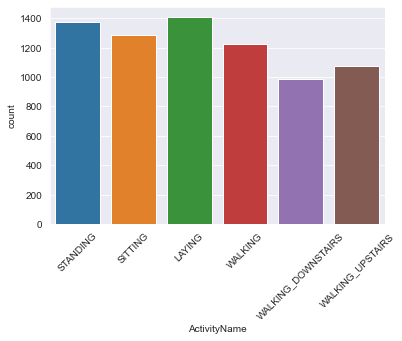

In [5]:
sns.set_style(style = 'darkgrid')
sns.countplot(x = train['ActivityName'])
plt.xticks(rotation = 45)
plt.show()

- No imbalance as such. Alsmost similar count for all categories.

**Let's perfrom some** ***Exploratory Data Analysis*** **as follows**

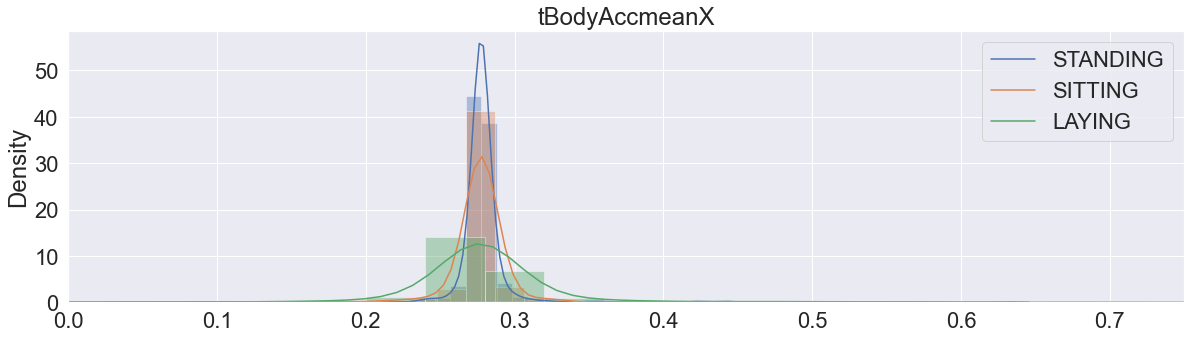

In [6]:
plt.figure(figsize = (20, 5))
sns.set_theme(font_scale=2)
sns.distplot(x = train[train['ActivityName']=='STANDING']['tBodyAccmeanX'])
sns.distplot(x = train[train['ActivityName']=='SITTING']['tBodyAccmeanX'])
sns.distplot(x = train[train['ActivityName']=='LAYING']['tBodyAccmeanX'])
plt.legend(['STANDING', 'SITTING', 'LAYING'])
plt.xlim((0, 0.75))
plt.title('tBodyAccmeanX')
plt.show()

- All activities are overlapped.
- No a good feature to distinguish.

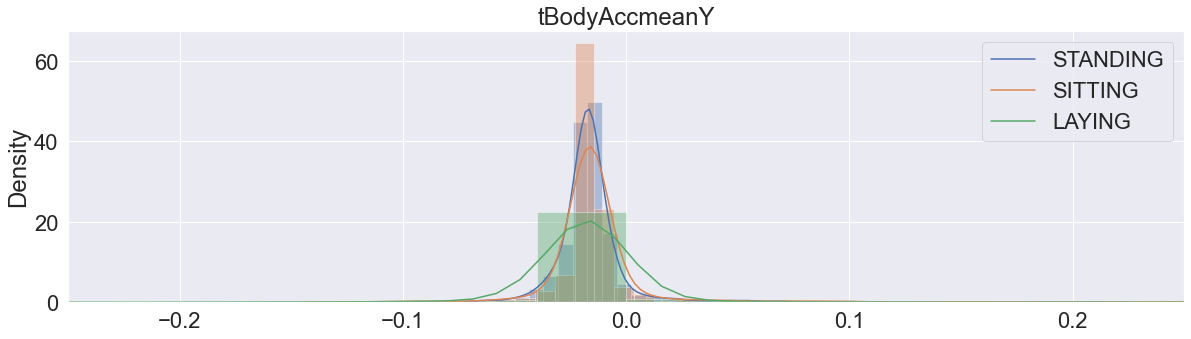

In [7]:
plt.figure(figsize = (20, 5))
sns.set_theme(font_scale=2)
sns.distplot(x = train[train['ActivityName']=='STANDING']['tBodyAccmeanY'])
sns.distplot(x = train[train['ActivityName']=='SITTING']['tBodyAccmeanY'])
sns.distplot(x = train[train['ActivityName']=='LAYING']['tBodyAccmeanY'])
plt.legend(['STANDING', 'SITTING', 'LAYING'])
plt.xlim((-0.25, 0.25))
plt.title('tBodyAccmeanY')
plt.show()

- Again, Overlap.

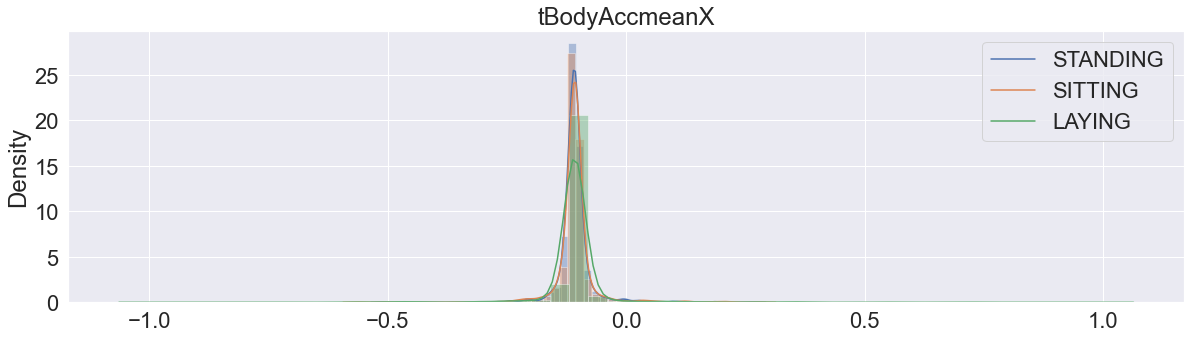

In [8]:
plt.figure(figsize = (20, 5))
sns.set_theme(font_scale=2)
sns.distplot(x = train[train['ActivityName']=='STANDING']['tBodyAccmeanZ'])
sns.distplot(x = train[train['ActivityName']=='SITTING']['tBodyAccmeanZ'])
sns.distplot(x = train[train['ActivityName']=='LAYING']['tBodyAccmeanZ'])
plt.legend(['STANDING', 'SITTING', 'LAYING'])
plt.title('tBodyAccmeanZ')
plt.title('tBodyAccmeanX')
plt.show()

- `tBodyAccmean` values are not good for formulating the model.

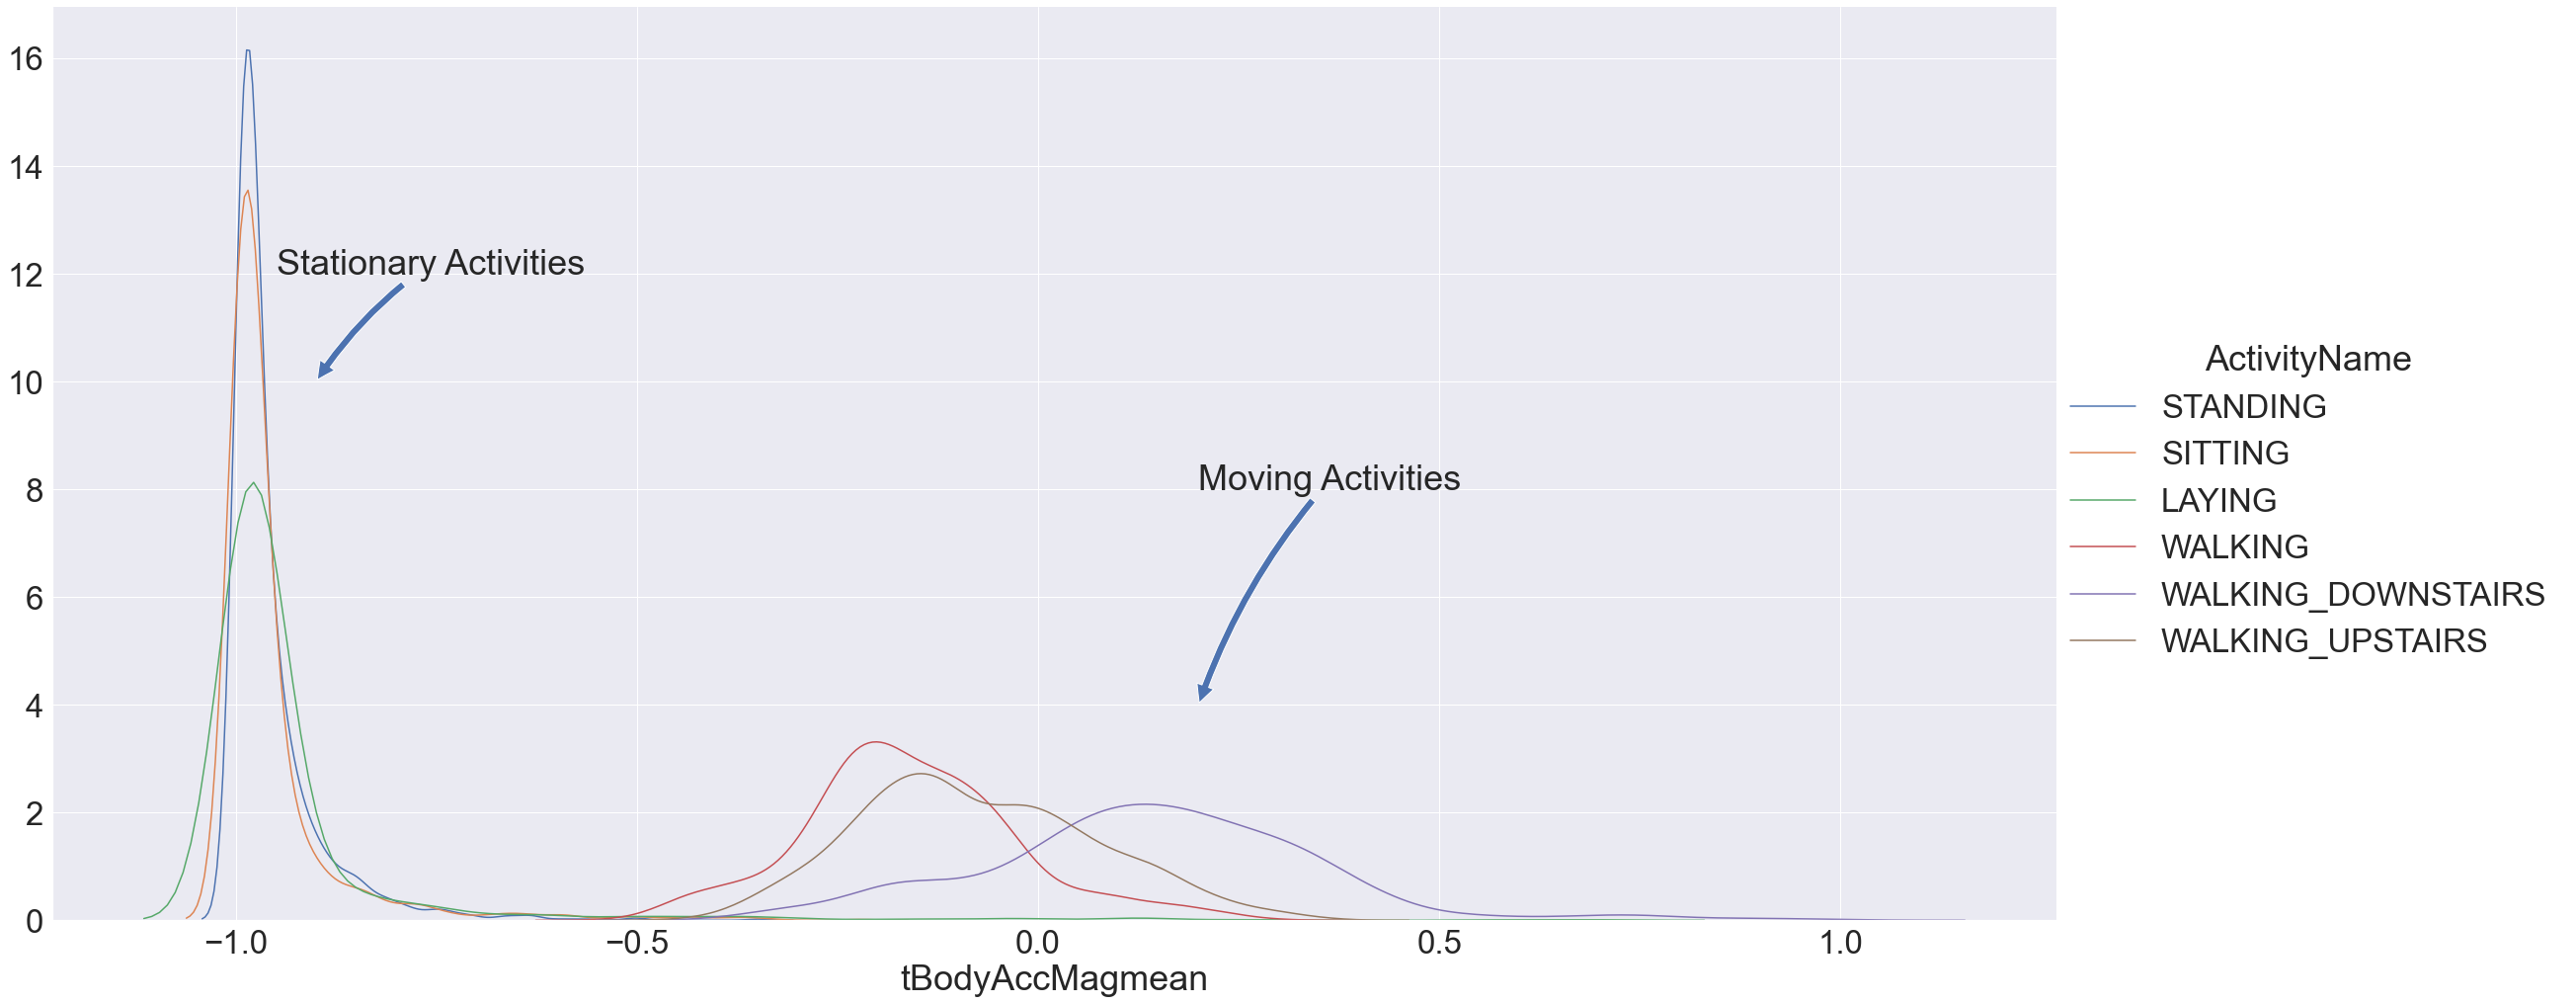

In [9]:
sns.set_palette(palette = 'BuPu')
sns.set_theme(font_scale=3)
facet_grid = sns.FacetGrid(data = train, hue = 'ActivityName', size = 15, aspect = 2)
facet_grid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate('Stationary Activities', xy = (-0.90,10), xytext=(-0.95, 12),
             arrowprops=dict(arrowstyle='simple', connectionstyle='arc3, rad=0.1'))
plt.annotate('Moving Activities', xy=(0.2, 4), xytext=(0.2, 8), 
             arrowprops=dict(arrowstyle='simple', connectionstyle='arc3, rad=0.1'))
plt.show()

- *Stationary activities such as Standing, Sitting and Laying are well separated from Moving activities such as Walking and its two variants as far as the variable `tBodyAccMagmean` is concerned.*

*Zooming theabove finidings* 

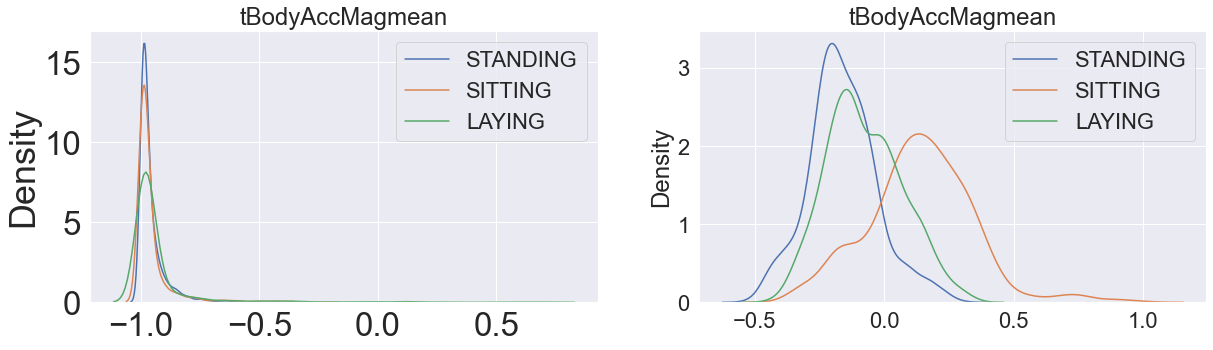

In [10]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
sns.set_theme(font_scale=2)
sns.distplot(x = train[train['ActivityName']=='STANDING']['tBodyAccMagmean'], hist=False)
sns.distplot(x = train[train['ActivityName']=='SITTING']['tBodyAccMagmean'], hist=False)
sns.distplot(x = train[train['ActivityName']=='LAYING']['tBodyAccMagmean'], hist=False)
plt.legend(['STANDING', 'SITTING', 'LAYING'])
plt.title('tBodyAccMagmean')

plt.subplot(122)
sns.distplot(x = train[train['ActivityName']=='WALKING']['tBodyAccMagmean'], hist=False)
sns.distplot(x = train[train['ActivityName']=='WALKING_DOWNSTAIRS']['tBodyAccMagmean'], hist=False)
sns.distplot(x = train[train['ActivityName']=='WALKING_UPSTAIRS']['tBodyAccMagmean'], hist=False)
plt.legend(['STANDING', 'SITTING', 'LAYING'])
plt.title('tBodyAccMagmean')

plt.show()

- Broadly speaking, this particular vairiable can be used to separate the moving and the stationary activities quite comfortably.

## Model Building
- Splitting the data into train and test sets.
- Apply some ML algorithms.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, :-3], train['Activity'], 
                                                    random_state = 0, test_size = 0.2)

### 1. Logistic Regression

In [12]:
from sklearn.linear_model import SGDClassifier
logreg = SGDClassifier(loss = 'log')
logreg.fit(X_train, y_train)

SGDClassifier(loss='log')

In [13]:
log_y_train_pred = logreg.predict(X_train)

*Calculating the metrics*

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('The accuracy of the model is {}'.format(accuracy_score(y_train, log_y_train_pred)))

The accuracy of the model is 0.9867369494983846


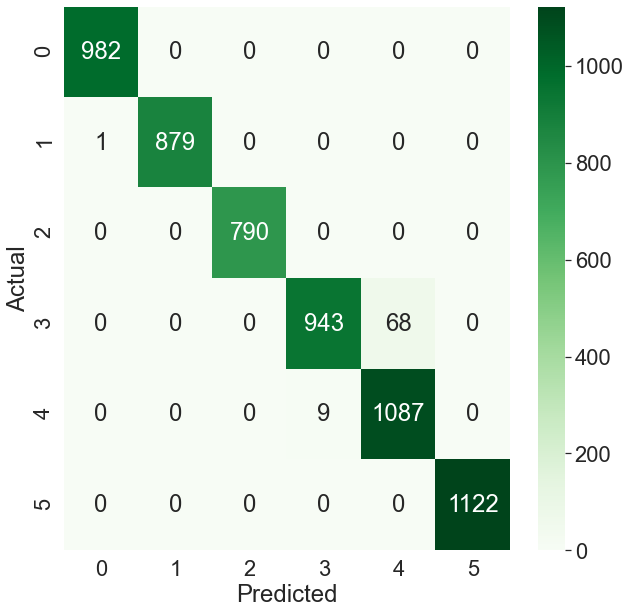

In [22]:
plt.figure(figsize = (10, 10))
sns.set_theme(font_scale = 2)
sns.heatmap(confusion_matrix(y_train, log_y_train_pred, labels=np.unique(train['Activity'])), 
            annot = True, cmap=plt.cm.Greens, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*Making the predictions on test data*

In [24]:
log_y_test_pred = logreg.predict(X_test)

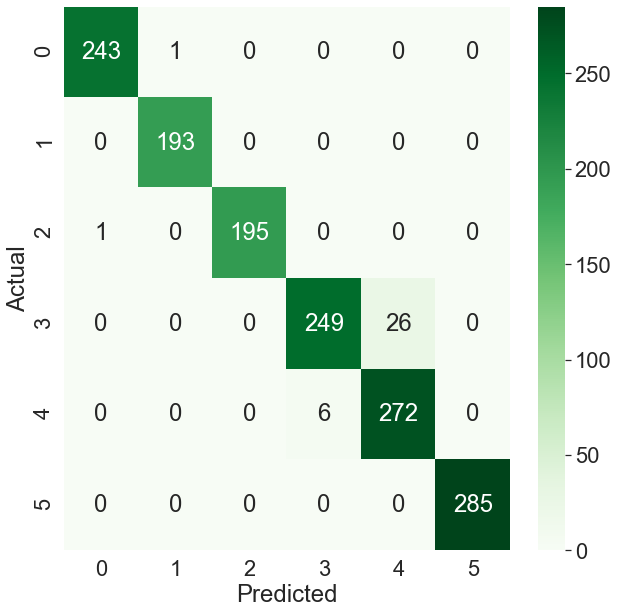

In [26]:
plt.figure(figsize = (10, 10))
sns.set_theme(font_scale = 2)
sns.heatmap(confusion_matrix(y_test, log_y_test_pred), 
            annot = True, cmap=plt.cm.Greens, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Even on the test data, the model is performing very well.

- *One point that can be made is that the features which are made by domain experts are really good in terms of training the model.*
- *This clearly demonstrates the importance of FEATURE ENGINEERING.*

### 2. SVC 

In [27]:
svc = SGDClassifier(loss = 'hinge')
svc.fit(X_train, y_train)
svc_y_train_pred = svc.predict(X_train)

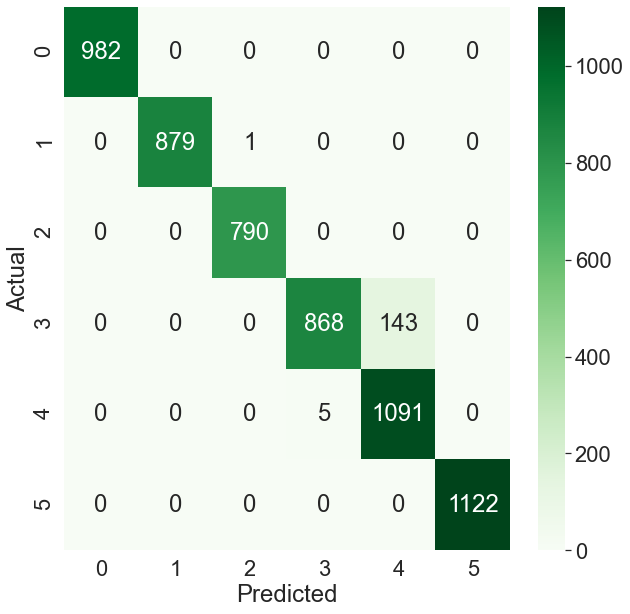

In [28]:
plt.figure(figsize = (10, 10))
sns.set_theme(font_scale = 2)
sns.heatmap(confusion_matrix(y_train, svc_y_train_pred), 
            annot = True, cmap=plt.cm.Greens, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
svc_y_test_pred = svc.predict(X_test)

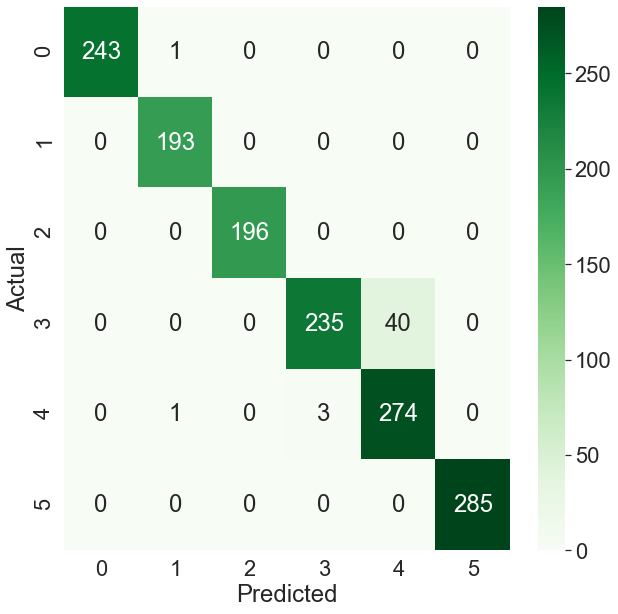

In [30]:
plt.figure(figsize = (10, 10))
sns.set_theme(font_scale = 2)
sns.heatmap(confusion_matrix(y_test, svc_y_test_pred), 
            annot = True, cmap=plt.cm.Greens, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- *Both Logistic Regression and SVC have performed similarly with Logistic Regression having a slight edge.*

## Deep Learning Modelling

- First, importing the raw data which is distributed across 9 different files.
- The entire data is in the form of *(data points, timesteps, variables)*.
    - Each data pount is a 2D array of shape (128, 9) and there are 7352 such instances.

In [37]:
import os
filenames = os.listdir(r'./UCI_HAR_Dataset/train/Inertial Signals')

In [105]:
total_train = []
for i in filenames:
    df = pd.read_csv(r'./UCI_HAR_Dataset/train/Inertial Signals/'+i, delim_whitespace=True, header=None)
    total_train.append(df.values)
total_train=np.array(total_train)
total_train = total_train.reshape(7352, 128, 9)

In [127]:
y_train_total = open(r'./UCI_HAR_Dataset/train/y_train.txt')
y_train_total = y_train_total.read()
y_train_total = y_train_total.replace('\n', ' ').strip().split(' ')

In [136]:
y_train_total = pd.get_dummies(np.array(y_train_total).astype(int)).values
y_train_total

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

*Formulating a simple LSTM based Deep Learning model.*

In [159]:
import keras
from keras.layers import LSTM, Dense, Dropout, Input, Flatten
from keras.models import Model, Sequential

In [161]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32, input_shape=(128, 9)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(6, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [162]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = 'accuracy')
performance = model.fit(total_train, y_train_total, batch_size = 16, epochs = 30)

Epoch 1/30
460/460 [==============================] - 16s 30ms/step - loss: 1.7925 - accuracy: 0.1741
Epoch 2/30
460/460 [==============================] - 14s 31ms/step - loss: 1.7836 - accuracy: 0.1923
Epoch 3/30
460/460 [==============================] - 16s 36ms/step - loss: 1.7841 - accuracy: 0.1986
Epoch 4/30
460/460 [==============================] - 16s 34ms/step - loss: 1.7828 - accuracy: 0.2047
Epoch 5/30
460/460 [==============================] - 16s 34ms/step - loss: 1.7796 - accuracy: 0.2047
Epoch 6/30
460/460 [==============================] - 15s 34ms/step - loss: 1.7813 - accuracy: 0.1929
Epoch 7/30
460/460 [==============================] - 16s 34ms/step - loss: 1.7850 - accuracy: 0.1917
Epoch 8/30
460/460 [==============================] - 16s 34ms/step - loss: 1.7767 - accuracy: 0.2018
Epoch 9/30
460/460 [==============================] - 16s 34ms/step - loss: 1.7812 - accuracy: 0.1955
Epoch 10/30
460/460 [==============================] - 16s 34ms/step - loss: 1.777

In [163]:
filenames_test = os.listdir(r'./UCI_HAR_Dataset/test/Inertial Signals')
total_test = []
for i in filenames_test:
    df = pd.read_csv(r'./UCI_HAR_Dataset/test/Inertial Signals/'+i, delim_whitespace=True, header=None)
    total_test.append(df.values)
total_test=np.array(total_test)
total_test = total_test.reshape(-1, 128, 9)

In [165]:
y_test_total = open(r'./UCI_HAR_Dataset/test/y_test.txt')
y_test_total = y_test_total.read()
y_test_total = y_test_total.replace('\n', ' ').strip().split(' ')
y_test_total = pd.get_dummies(np.array(y_test_total).astype(int)).values
y_test_total

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

In [184]:
predictions = model.predict(total_test)

In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [199]:
print(accuracy_score(np.argmax(y_test_total, axis=1), np.argmax(predictions, axis=1)))
print(confusion_matrix(np.argmax(y_test_total, axis=1), np.argmax(predictions, axis=1)))

0.17509331523583305
[[ 23  12  31  24  74 332]
 [ 21  10  23  23  65 329]
 [ 14   7  27  19  66 287]
 [ 21   4  11  29 100 326]
 [ 24   2  19  39  61 387]
 [ 19   8  32  26  86 366]]


- Deep Learning model has not been able to perform well.
- This case study clearly demonstrates the importance of Feature Engineering i.e. how important good features can be for making a model work. 
    - *This is the reason why Machine Learning models outperformed Deep Learning.*